In [34]:
## Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots

# Read in Data
df = pd.read_csv(r'movies.csv',encoding = "ISO-8859-1")



In [35]:
## Check for Missing Data
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

#No Missing Values in Data

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [36]:
# Changing budget data type from float to int64

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')


In [37]:
# Correcting Year Column

df['year_correct'] = df['released'].astype('str').str[:4]

In [38]:
# Order Data by Gross Revenue

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [39]:
#Removing Duplicates in Dataset
df.drop_duplicates(inplace = True)

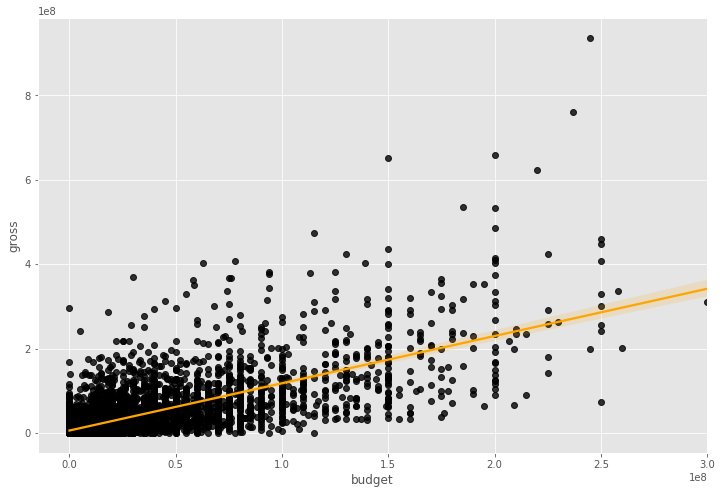

In [45]:
## EDA and Finding Correlations

# Regresion Scatter Plot - Budget vs Gross Revenue

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "black"}, line_kws = {"color": "orange"})

In [46]:
df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


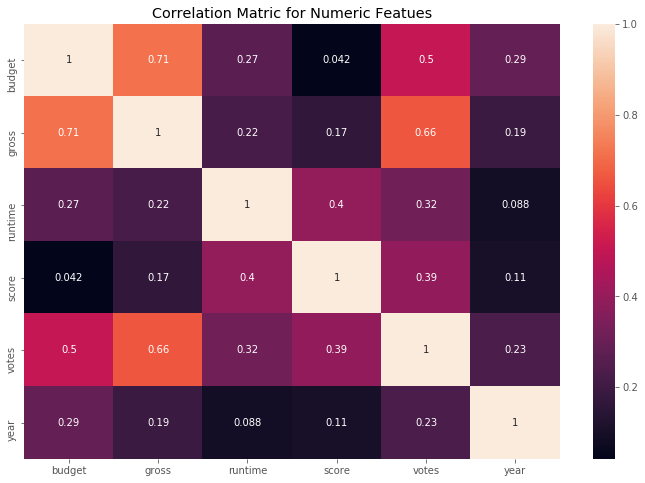

In [47]:
#Correlation Matrix for Numeric Features

correlation_matrix = df.corr(method='pearson')
plt.title('Correlation Matric for Numeric Featues')
plt.xlabel('Movie Numeric Features')
plt.ylabel('Movie Numeric Features')
sns.heatmap(correlation_matrix, annot= True)
plt.show()

In [23]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26


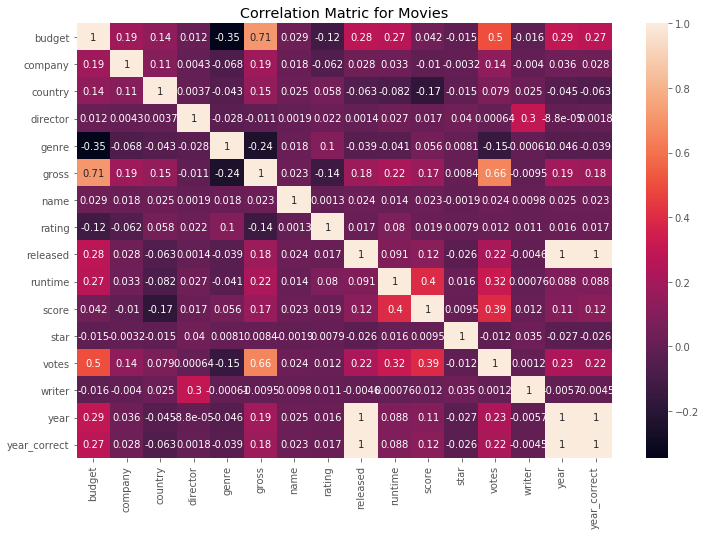

In [24]:
#Correlation Matrix for Numerized Features - all fields have numeric representations now

correlation_matrix = df_numerized.corr(method='pearson')

plt.title('Correlation Matric for Movies')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

sns.heatmap(correlation_matrix, annot= True)

plt.show()

In [28]:
pd.set_option("display.max_rows",None)

In [29]:
#Organize correlations 
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs


budget        budget          1.000000
              company         0.187205
              country         0.137635
              director        0.011602
              genre          -0.346794
              gross           0.712196
              name            0.028712
              rating         -0.119660
              released        0.276635
              runtime         0.268226
              score           0.042145
              star           -0.015061
              votes           0.503924
              writer         -0.015611
              year            0.291009
              year_correct    0.274820
company       budget          0.187205
              company         1.000000
              country         0.107950
              director        0.004320
              genre          -0.068330
              gross           0.187220
              name            0.018098
              rating         -0.062250
              released        0.027898
              runtime    

In [30]:
#Sorted Correlation values
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.346794
budget        genre          -0.346794
gross         genre          -0.242676
genre         gross          -0.242676
score         country        -0.174414
country       score          -0.174414
votes         genre          -0.150519
genre         votes          -0.150519
rating        gross          -0.135538
gross         rating         -0.135538
budget        rating         -0.119660
rating        budget         -0.119660
country       runtime        -0.081796
runtime       country        -0.081796
genre         company        -0.068330
company       genre          -0.068330
country       year_correct   -0.062707
year_correct  country        -0.062707
country       released       -0.062609
released      country        -0.062609
rating        company        -0.062250
company       rating         -0.062250
year          genre          -0.046259
genre         year           -0.046259
country       year           -0.045204
year          country    

In [83]:
# Highest Correlations
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

#Votes and Budget have highest correlation to gross earnings


votes         budget          0.503924
budget        votes           0.503924
votes         gross           0.662457
gross         votes           0.662457
              budget          0.712196
budget        gross           0.712196
released      year            0.996187
year          released        0.996187
year_correct  year            0.996229
year          year_correct    0.996229
year_correct  released        0.999389
released      year_correct    0.999389
budget        budget          1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company    

In [ ]:
## Exploratory Data Analysis

In [64]:
company_df = df.groupby(['name','company'])['budget','gross'].sum().sort_values(by = 'gross', ascending = False)

company_df.head(15)

C:\Users\ritik\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,budget,gross
name,company,,
Star Wars: The Force Awakens,Lucasfilm,245000000,936662225
Avatar,Twentieth Century Fox Film Corporation,237000000,760507625
Titanic,Twentieth Century Fox Film Corporation,200000000,658672302
Jurassic World,Universal Pictures,150000000,652270625
The Avengers,Marvel Studios,220000000,623357910
The Dark Knight,Warner Bros.,185000000,534858444
Rogue One,Lucasfilm,200000000,532177324
Finding Dory,Pixar Animation Studios,200000000,486295561
Star Wars: Episode I - The Phantom Menace,Lucasfilm,115000000,474544677


In [65]:

company_df = df.groupby(['company'])['budget','gross'].sum().sort_values(by = 'gross', ascending = False)

company_df.head(10)

C:\Users\ritik\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,budget,gross
company,,
Warner Bros.,16593700000,21322318408
Universal Pictures,13832130001,19430051320
Paramount Pictures,11656600000,17115702495
Twentieth Century Fox Film Corporation,9859100000,14788570587
Walt Disney Pictures,7561200000,10455507123
Columbia Pictures,7251900000,8824216545
New Line Cinema,5329700000,8540112287
Columbia Pictures Corporation,6169807000,7720114061
Touchstone Pictures,3952200000,6688156475


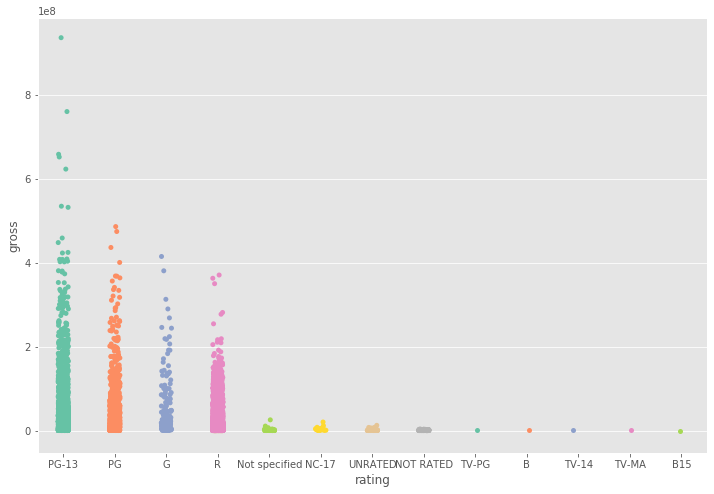

In [79]:
# Rating vs Gross Earning Strip Plot
sns.stripplot(x="rating", y="gross", data=df, palette = "Set2")

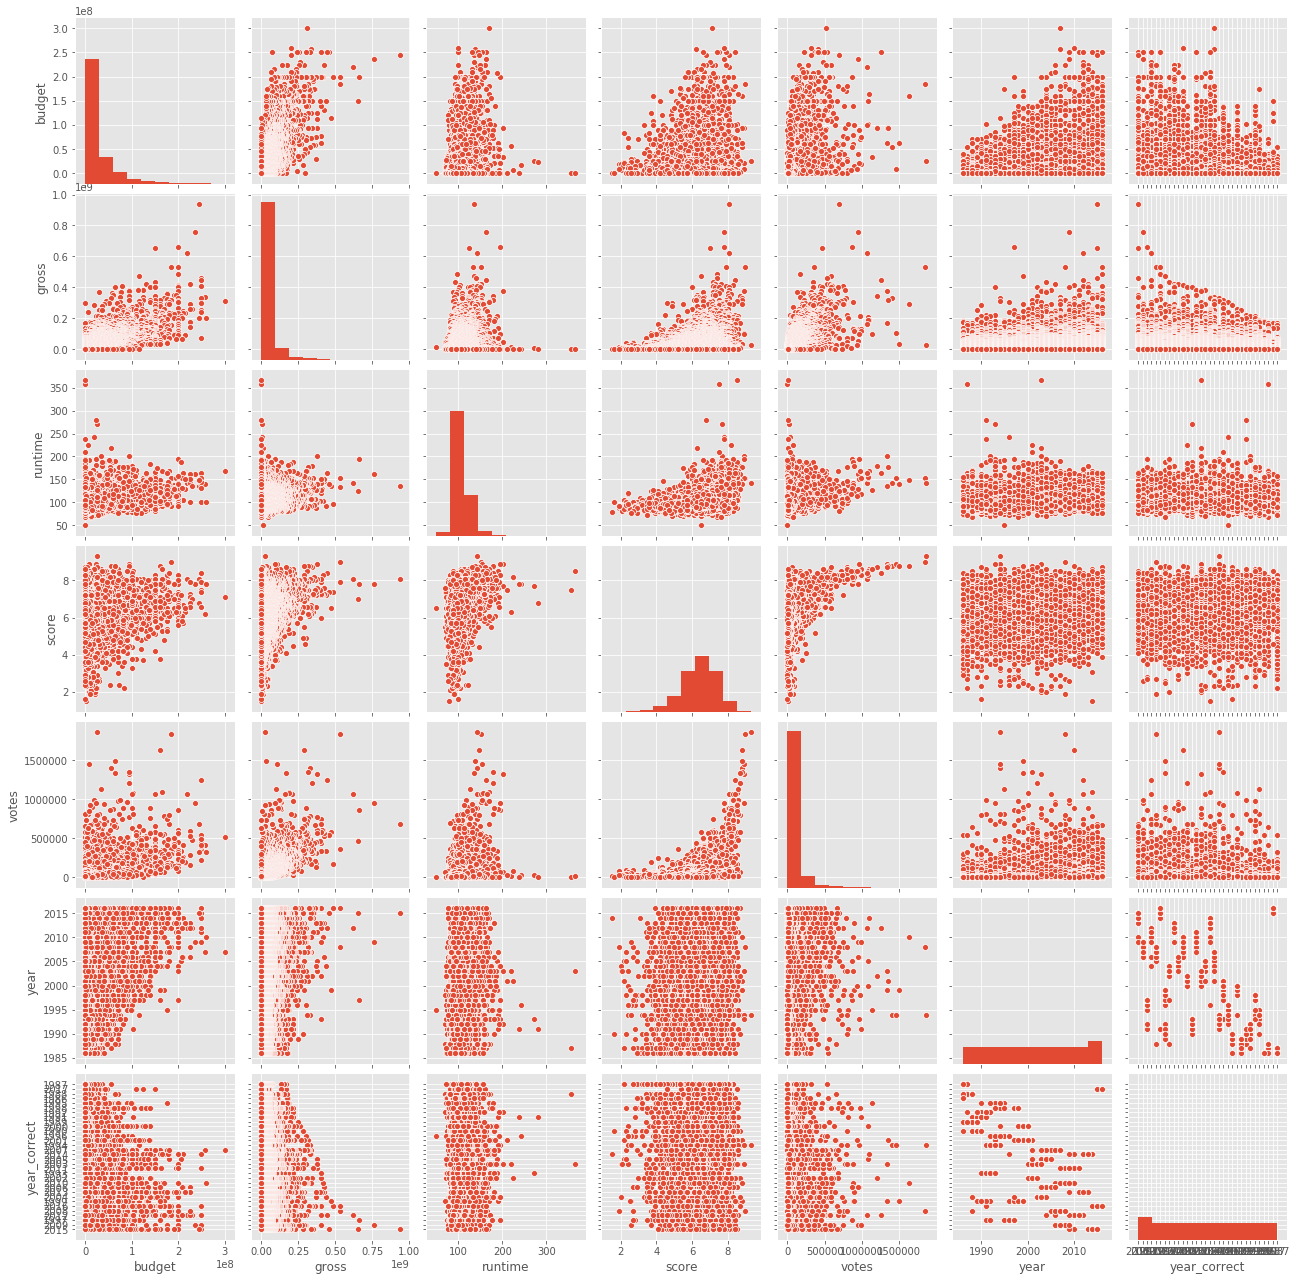

In [74]:
#Plotting relationship in Dataset

sns.pairplot(df,diag_kind='hist')